In [156]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
full_df = pd.merge(ride_data_df, city_data_df, on='city')

# Display the data table for preview
full_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [164]:
# Obtain the x and y coordinates for each of the three city types
#x = #No of rides per city
#y = #Average Fare
#full_df.groupby(['type', 'city', 'driver_count']).mean()

# Build the scatter plots for each city types


# Incorporate the other graph properties
#size = full_df('driver_count')

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure



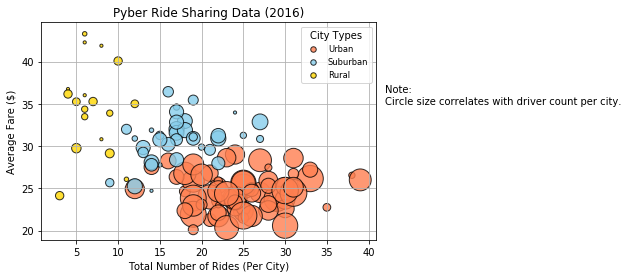

In [3]:
# Show plot
#plt.show()

## Total Fares by City Type

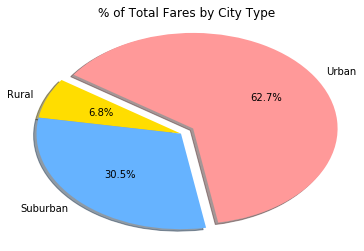

In [161]:
# Calculate Type Percents
total_fares = full_df['fare'].sum()
fares = (full_df.groupby(['type']).sum()).iloc[:,0]
rural_fares = fares[0]
suburban_fares = fares[1]
urban_fares = fares[2]
rural_f_perc = (rural_fares / total_fares) * 100
suburban_f_perc = (suburban_fares / total_fares) * 100
urban_f_perc = (urban_fares / total_fares) * 100

# Build Pie Chart
types = ["Urban", "Rural", "Suburban"]
percentages = [urban_f_perc, rural_f_perc, suburban_f_perc]
colors= ["#ff9999", "#ffdd00", "#66b3ff"]
explode = (0.1, 0, 0)
plt.title("% of Total Fares by City Type")
plt.pie(percentages, explode=explode, labels=types, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=280)
plt.axis("tight")

# Save Figure
plt.savefig('charts/total_fares_by_city_type.png')

In [130]:
# Show Figure
plt.show()

## Total Rides by City Type

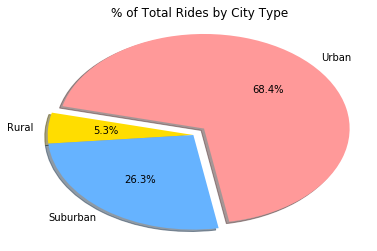

<Figure size 432x288 with 0 Axes>

In [163]:
# Calculate Ride Percents
total_rides = len(full_df)
urban_count = len(full_df.loc[full_df["type"] == "Urban", :])
urban_r_perc = (urban_count / total_rides) * 100
suburban_count = len(full_df.loc[full_df["type"] == "Suburban", :])
suburban_r_perc = (suburban_count / total_rides) * 100
rural_count = len(full_df.loc[full_df["type"] == "Rural", :])
rural_r_perc = (rural_count / total_rides) * 100

# Build Pie Chart
percentages = [urban_r_perc, rural_r_perc, suburban_r_perc]
colors= ["#ff9999", "#ffdd00", "#66b3ff"]
explode = (0.1, 0, 0)
plt.title("% of Total Rides by City Type")
plt.pie(percentages, explode=explode, labels=types, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=280)
plt.axis("tight")
plt.show()

# Save Figure
plt.savefig('charts/total_rides_by_city_type.png')

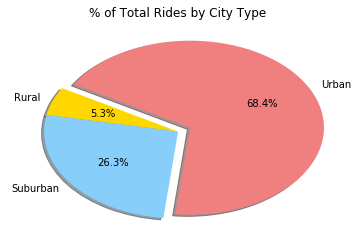

In [5]:
# Show Figure
#plt.show()

## Total Drivers by City Type

In [208]:
# Calculate Driver Percents 
drives = len((full_df.groupby(['type','driver_count'])).count())
rural_drives = len(full_df[full_df['type'] == 'Rural'].groupby('driver_count').count())
suburban_drivers = len(full_df[full_df['type'] == 'Suburban'].groupby('driver_count').count())
urban_drivers = len(full_df[full_df['type'] == 'Urban'].groupby('driver_count').count())
print(rural_drives, suburban_drivers, urban_drivers,  drives)



# Build Pie Charts

# Save Figure
#driver_count_df.columns = ["Drivers by City Type", "City Count"]
#driver_count_df["% of Drivers Count"] = round(driver_count_df["Drivers by City Type"] / sum(driver_count_df["Drivers by City Type"]) * 100, 2)
#driver_count_df

7 18 45 70


In [190]:
# Show Figure
plt.show()